<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estimate-of-$\hat{m}_w$-for-$\phi$-=-0,-$\pi$-and-2$\pi$" data-toc-modified-id="Estimate-of-$\hat{m}_w$-for-$\phi$-=-0,-$\pi$-and-2$\pi$-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estimate of $\hat{m}_w$ for $\phi$ = 0, $\pi$ and 2$\pi$</a></span><ul class="toc-item"><li><span><a href="#Determining-m1,-m2-&amp;-m3" data-toc-modified-id="Determining-m1,-m2-&amp;-m3-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Determining m1, m2 &amp; m3</a></span></li></ul></li><li><span><a href="#Estimate-of-$\hat{m}_w$-Using-Arbitary-Echo-Time" data-toc-modified-id="Estimate-of-$\hat{m}_w$-Using-Arbitary-Echo-Time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimate of $\hat{m}_w$ Using Arbitary Echo Time</a></span></li><li><span><a href="#Two-Point-Dixon,-Revisited" data-toc-modified-id="Two-Point-Dixon,-Revisited-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Two Point Dixon, Revisited</a></span></li></ul></div>

In [1]:
# Modules
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os

import matplotlib.pylab as plt
import numpy as np
import math
import plot as plot
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
# Modules
from mpl_toolkits.axes_grid1 import ImageGrid
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, HBox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# load Bruker raw reader module
import brukerMRI_reader as bruker
# load modules
import pylab as plt
import numpy as np

In [2]:
# Select data to reconstruct
def recon_fat_water(exp_number):
    series = exp_number
    path = "/Users/admin/Desktop/brukerMRI-master/scans/w_p/"  # access to mapped MRT network dri
    Exp = bruker.ReadExperiment(path,series)

    # Full recon steps
    recopart = ['quadrature', 'phase_rotate', 'zero_filling', 'FT', 'cutoff']
    Exp.bruker_reco(recopart)

    return Exp.image

# Three Point DIXON Methods

These method includes an additional measurement
to allow the off-resonance frequency $w$ to
be estimated. The original proposal [2] was for
spin-echo acquisitions, and used measurements at
$\pi$, 0, and $2\pi$ The echoes were symmetrically distributed
about the spin echo.

A better choice that also works for gradient echoes
is to pick $T_{E,i}$'s such that:

\begin{equation*}
\omega_fT_{E,i}= {0,\pi,2\pi}
\tag{13}
\end{equation*}


Neglecting $\phi_0$ as before, the three images can be written

$$
\begin{align}
m_1   = (m_w + m_f)
\tag{14} \\
m_2   = (m_w - m_f)e^{i\phi}
\tag{15} \\
m_3   = (m_w + m_f)e^{i2\phi}
\tag{16}
\end{align}
$$

from images $m_1$ and $m_3$ we can estimate

$$
\begin{equation*}
2\hat{\phi} = \angle m_1^*m_3
\tag{17}
\end{equation*}
$$

We can then phase correct $m_2$, and combine $m_1$ to compute $\hat{m}_w$,

$$
\begin{align}
\hat{m}_w   = \frac12(m_1 + m_2e^{-i\hat{\phi}})
\tag{18}\\
            =\frac12((m_w + m_f) 
\tag{19}\\
            + (m_w - m_f)e^{i\phi}e^{-i\hat{\phi}})
\tag{20}\\
            = \frac12((m_w(1 + e^{i(\phi-\hat{\phi})})
\tag{21}\\
            + m_f(1 - e^{i(\phi-\hat{\phi})}))
\tag{22}\\
\end{align}
$$

## Estimate of $\hat{m}_w$ for $\phi$ = 0, $\pi$ and 2$\pi$

In [3]:
img_file = np.array([[10,2.606],
                      [13,3.257],
                      [17,3.571],
                      [18,4.4],
                      [19,3],
                      [20,3.25],
                      [27,3.75],
                      [23,4],
                      [29,4.6],
                      [31,5.2],
                      [32,6],
                      [33,6.6]])

In [4]:
import BrukerMRI as bruker2
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

images = np.zeros((img_file.shape[0],128,128),dtype='complex')

for i in range(img_file.shape[0]):
    MainDir = "/Users/admin/Desktop/brukerMRI-master/scans/w_p/"
    ExpNum = int(img_file[i,0])
    Experiment = bruker2.ReadExperiment(MainDir, ExpNum)
    kdata = Experiment.raw_fid.astype(np.complex64)
    kdata=np.reshape(kdata,[128,128])
    rawdata=np.fft.fftshift(np.fft.fftn(kdata,axes=(0,1),norm='ortho'),[0,1])
    intensity = rawdata
    images[i,:,:]=intensity

In [5]:
def calc_t2(t1):
    n = t1*(f_fat-f_water)
    t2 = (n+0.5)/(f_fat-f_water)
    return t2

In [6]:
def calc_t3(t1):
    n = t1*(f_fat-f_water)
    t3 = (n+1)/(f_fat-f_water)
    return t3

### Determining m1, m2 & m3

In [7]:
# Water at 4.7ppm. Main fat peaks ppm: 6.7, 1.718, 1.162, 0.863, 0.581.

Assuming 1 component of fat

In [8]:
f_fat = 6.7*400
f_water = 4.7*400
w_fat = 2*np.pi*f_fat
w_water = 2*np.pi*f_water

In [9]:
te1_1 = 3.25
te2_1 = calc_t2(te1_1)
te2_1

3.250625

In [10]:
te3_1 = calc_t3(te1_1)
te3_1

3.25125

In [11]:
img_file

array([[10.   ,  2.606],
       [13.   ,  3.257],
       [17.   ,  3.571],
       [18.   ,  4.4  ],
       [19.   ,  3.   ],
       [20.   ,  3.25 ],
       [27.   ,  3.75 ],
       [23.   ,  4.   ],
       [29.   ,  4.6  ],
       [31.   ,  5.2  ],
       [32.   ,  6.   ],
       [33.   ,  6.6  ]])

In [12]:
i_f = list(img_file[:,1])
i_f

[2.606, 3.257, 3.571, 4.4, 3.0, 3.25, 3.75, 4.0, 4.6, 5.2, 6.0, 6.6]

In [13]:
m1_14 = images[i_f.index(3.0)] 
m2_15 = images[i_f.index(3.25)]
m3_16 = images[i_f.index(3.257)]

In [14]:
phi_hat = np.angle(np.conj(m1_14)*m3_16)
m_hat_w_18 = 0.5*(m1_14 + m2_15*np.exp(-1j*phi_hat))
m_hat_f_18 = 0.5*(m1_14 - m2_15*np.exp(-1j*phi_hat))

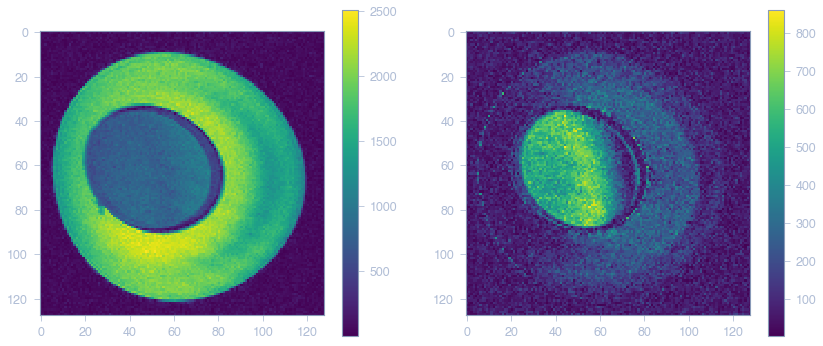

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.imshow(np.abs(m_hat_w_18))
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(m_hat_f_18))
plt.colorbar()

## Estimate of $\hat{m}_w$ Using Arbitary Echo Time

$$
\begin{align}
\angle m_1^*m_3 = \omega(t_3 - t_1)
\tag{23} \\
\hat{\phi} = \angle m_1^*m_2
=\omega(t_2 - t_1)
\tag{24} \\
\omega   = \angle m_1^*m_3/(t_3 - t_1)
\tag{25} \\
\hat{\phi} = \angle m_1^*m_3*(t_2 - t_1)/(t_3 - t_1)
\tag{26}
\end{align}
$$

In [16]:
phi_hat_2 = (3.25-3.0)/(3.257-3.0)*np.angle(np.conj(m1_14)*m3_16)
m_hat_w_18_2 = 0.5*(m1_14 + m2_15*np.exp(-1j*phi_hat_2))
m_hat_f_18_2 = 0.5*(m1_14 - m2_15*np.exp(-1j*phi_hat_2))

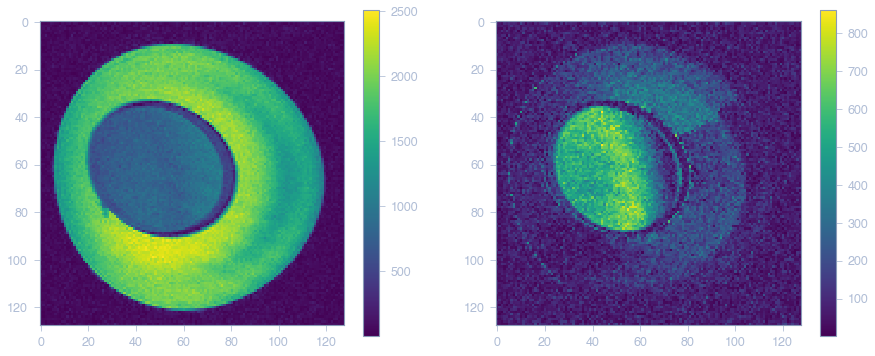

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.imshow(np.abs(m_hat_w_18_2))
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(m_hat_f_18_2))
plt.colorbar()

## Two Point Dixon, Revisited

In [18]:
m1_143 = images[i_f.index(3.25)]
m2_153 = images[i_f.index(3.257)]

In [19]:
phi_hat2 = 0.5*np.angle(np.power((np.conj(m1_143)*m2_153),2))
m_hat_w_182 = 0.5*(m1_143 + m2_153*np.exp(-1j*phi_hat2))
m_hat_f_182 = 0.5*(m1_143 - m2_153*np.exp(-1j*phi_hat2))

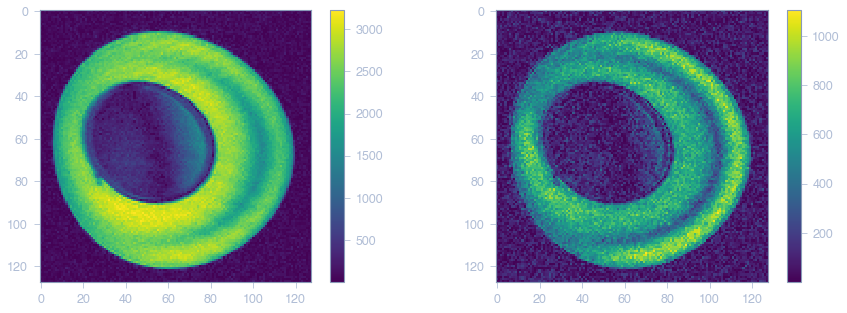

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(np.abs(m_hat_w_182))
plt.colorbar()
plt.subplot(122)
plt.imshow(np.abs(m_hat_f_182))
plt.colorbar()